<a href="https://colab.research.google.com/github/Track-suite/ML_Assignment2_IT19052298_IT19111070_IT19212050-/blob/IT19111070-Asram/Demential_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Dependencies

In [157]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, mean_squared_error
from sklearn.model_selection import train_test_split
import plotly.figure_factory as ff
import plotly.express as px
from pylab import rcParams
%matplotlib inline

#Hyperparameter tuning
from sklearn.model_selection import StratifiedKFold,GridSearchCV,RandomizedSearchCV,cross_val_score
from hyperopt import tpe,STATUS_OK,Trials,hp,fmin,STATUS_OK,space_eval


In [76]:
#importing dementia data set from csv file(dementia_dataset.csv) to a Pandas dataframe
dementia_data = pd.read_csv('/content/dementia_dataset.csv')

Pre-processing and Visualization



In [77]:
#showing the first five rows of the dementia data set
dementia_data.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [78]:
#finding out the total number of coulums and rows of and colums of the dementia data set
dementia_data.shape 

(373, 15)

In [79]:
#get the data types of the each feature in the data set
dementia_data.dtypes

Subject ID     object
MRI ID         object
Group          object
Visit           int64
MR Delay        int64
M/F            object
Hand           object
Age             int64
EDUC            int64
SES           float64
MMSE          float64
CDR           float64
eTIV            int64
nWBV          float64
ASF           float64
dtype: object

In [80]:
#Finding more information about the data set
dementia_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


In [81]:
#Renaming the colum M/F to as Gender
dementia_data = dementia_data.rename(columns = {'M/F' : 'Gender'})

Nondemented    190
Demented       146
Converted       37
Name: Group, dtype: int64

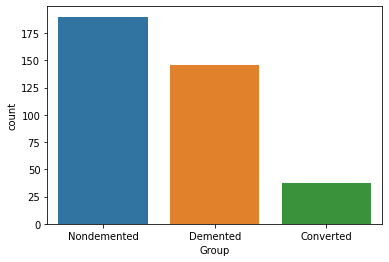

In [82]:
#Visualizing data for Object Features
#barchart of the Group column
barchart_Group = sns.countplot(data=dementia_data,x='Group')
barchart_Group.figure.savefig("Group.png")
dementia_data.Group.value_counts()

F    213
M    160
Name: Gender, dtype: int64

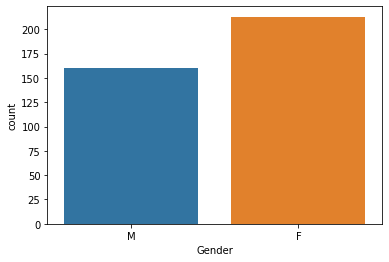

In [83]:
#barchart of the Gender column
barchart_Gender = sns.countplot(data=dementia_data,x='Gender')
barchart_Gender.figure.savefig("Gender.png")
dementia_data.Gender.value_counts()

R    373
Name: Hand, dtype: int64

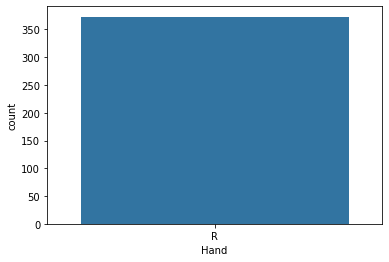

In [84]:
#barchart of the Hand column
barchart_Hand = sns.countplot(data=dementia_data,x='Hand')
barchart_Hand.figure.savefig("Hand.png")
dementia_data.Hand.value_counts()

In [85]:
#Visualizing for numerical data
#Checking the distribution of the data
dementia_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Visit,373.0,1.882038,0.922843,1.000,1.000,2.000,2.000,5.000
MR Delay,373.0,595.104558,635.485118,0.000,0.000,552.000,873.000,2639.000
Age,373.0,77.013405,7.640957,60.000,71.000,77.000,82.000,98.000
EDUC,373.0,14.597855,2.876339,6.000,12.000,15.000,16.000,23.000
SES,354.0,2.460452,1.134005,1.000,2.000,2.000,3.000,5.000
MMSE,371.0,27.342318,3.683244,4.000,27.000,29.000,30.000,30.000
CDR,373.0,0.290885,0.374557,0.000,0.000,0.000,0.500,2.000
eTIV,373.0,1488.128686,176.139286,1106.000,1357.000,1470.000,1597.000,2004.000
nWBV,373.0,0.729568,0.037135,0.644,0.700,0.729,0.756,0.837
ASF,373.0,1.195461,0.138092,0.876,1.099,1.194,1.293,1.587


In [86]:
#eTIV
eTIV= list(dementia_data['eTIV'].values)
hist_data = [eTIV]
group_labels = ["eTIV"]
fig = ff.create_distplot(hist_data,group_labels,show_hist = True)
fig.show()


In [87]:
#nWBV
nWBV= list(dementia_data['nWBV'].values)
hist_data = [nWBV]
group_labels = ["nWBV"]
fig = ff.create_distplot(hist_data,group_labels,show_hist = True)
fig.show()

In [88]:
#ASF
ASF= list(dementia_data['ASF'].values)
hist_data = [ASF]
group_labels = ["ASF"]
fig = ff.create_distplot(hist_data,group_labels,show_hist = True)
fig.show()

In [89]:
#CDR
CDR= list(dementia_data['CDR'].values)
hist_data = [CDR]
group_labels = ["CDR"]
fig = ff.create_distplot(hist_data,group_labels,show_hist = True)
fig.show()

In [90]:
#Age
Age= list(dementia_data['Age'].values)
hist_data = [Age]
group_labels = ["Age"]
fig = ff.create_distplot(hist_data,group_labels,show_hist = True)
fig.show()

In [91]:
#EDUC
EDUC= list(dementia_data['EDUC'].values)
hist_data = [EDUC]
group_labels = ["EDUC"]
fig = ff.create_distplot(hist_data,group_labels,show_hist = True)
fig.show()

In [92]:
#Drawing box pot graph for eTIV
fig = px.box(data_frame = dementia_data,
 x = "eTIV",
 width = 820,
 height = 310)
fig.show()

In [93]:
#Drawing box pot graph for nWBV
fig = px.box(data_frame = dementia_data,
 x = "nWBV",
 width = 820,
 height = 310)
fig.show()

In [94]:
#Drawing box pot graph for ASF
fig = px.box(data_frame = dementia_data,
 x = "ASF",
 width = 820,
 height = 310)
fig.show()


In [95]:
#Drawing box pot graph for CDR
fig = px.box(data_frame = dementia_data,
 x = "CDR",
 width = 820,
 height = 310)
fig.show()

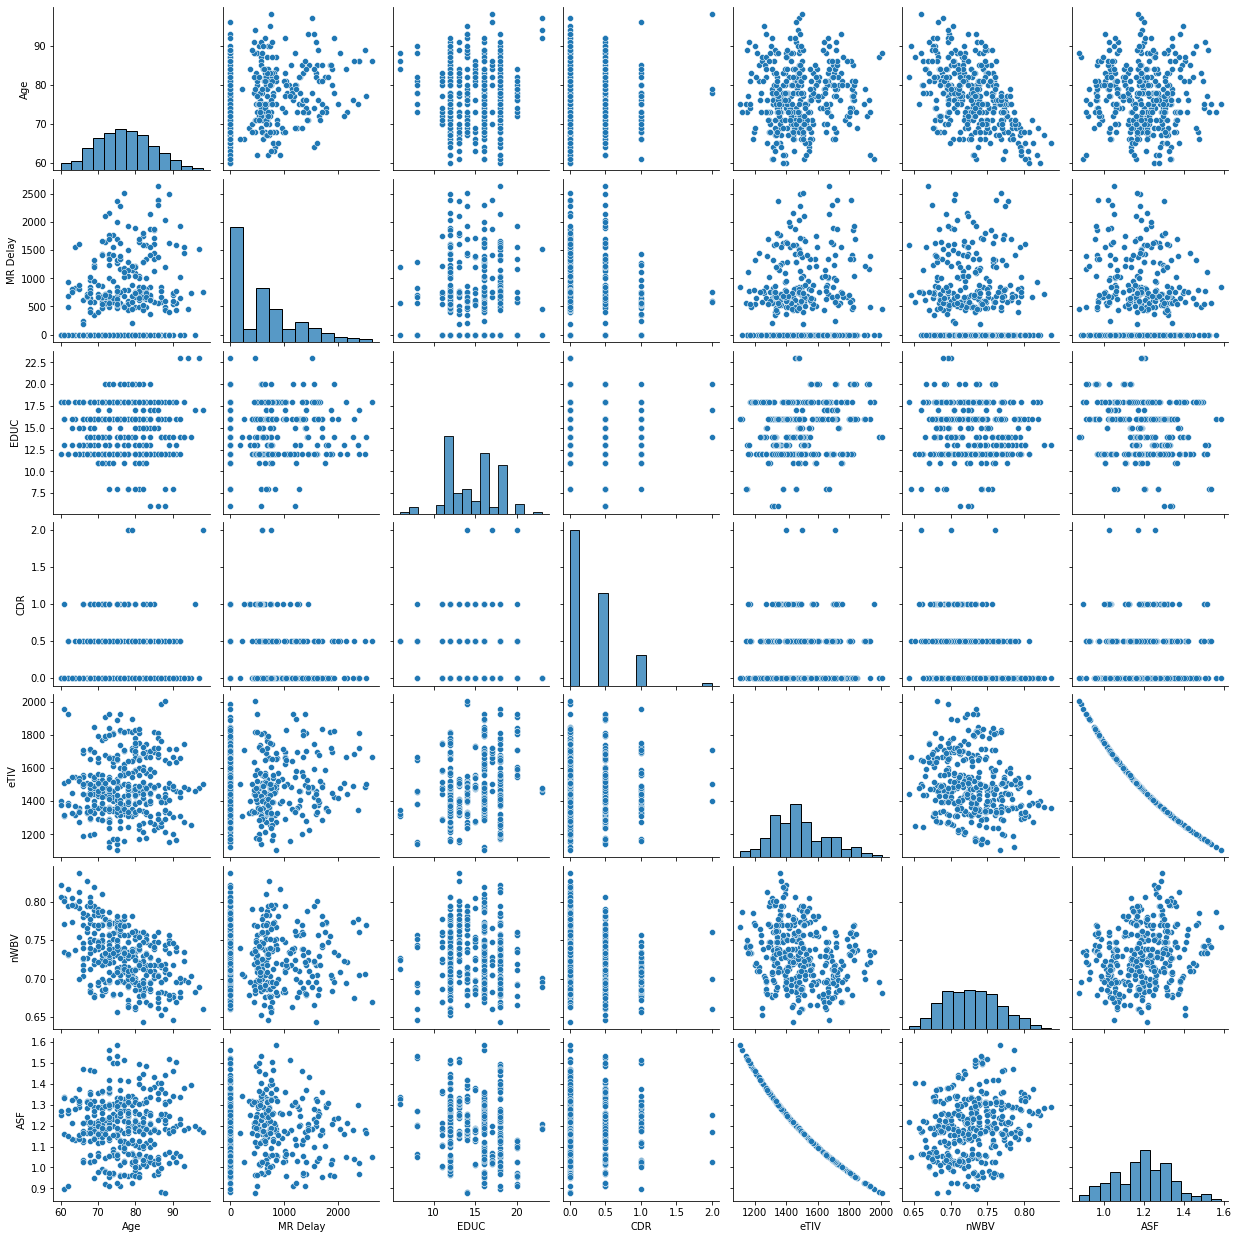

In [96]:
#Drawing plot graphs for all the numerical variables

rcParams['figure.figsize'] = 7,6
columns = ['Age','MR Delay', 'EDUC', 'SES', 'MMSE', 'CDR','eTIV','nWBV','ASF']
a=dementia_data.fillna('')
plot_graphs = sns.pairplot(a[columns])

In [97]:
#Data Pre-processing
#Checking for missing values in every column
dementia_data.isnull().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
Gender         0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [98]:
#SES column has null values. Therefore filling the null values of SES column
dementia_data['SES'].fillna(0)

0      2.0
1      2.0
2      0.0
3      0.0
4      0.0
      ... 
368    1.0
369    1.0
370    2.0
371    2.0
372    2.0
Name: SES, Length: 373, dtype: float64

In [99]:
#MMSE column has null values. Therefore filling the null values of MMSE column
dementia_data['MMSE'].fillna(0)

0      27.0
1      30.0
2      23.0
3      28.0
4      22.0
       ... 
368    28.0
369    26.0
370    30.0
371    30.0
372    30.0
Name: MMSE, Length: 373, dtype: float64

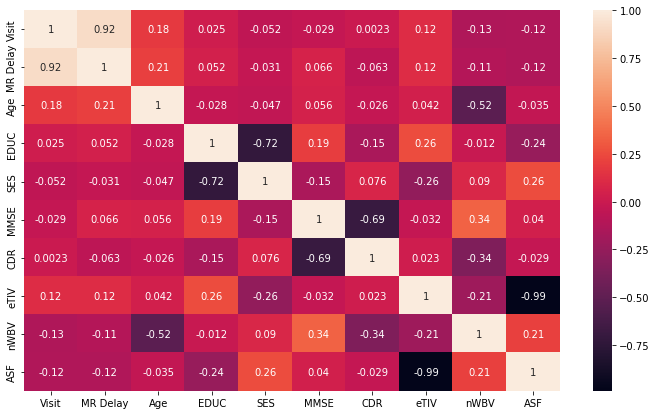

In [100]:
#Drawing a heat map
plt.figure(figsize=(12,7))
sns.heatmap(dementia_data.corr(),annot=True)

In [101]:
#According to the above heat map following features can be extracted to create the model
data_frame = dementia_data[['eTIV', 'nWBV', 'ASF', 'CDR', 'Group']]
data_frame.head()

,eTIV,nWBV,ASF,CDR,Group
0,1987,0.696,0.883,0.0,Nondemented
1,2004,0.681,0.876,0.0,Nondemented
2,1678,0.736,1.046,0.5,Demented
3,1738,0.713,1.010,0.5,Demented
4,1698,0.701,1.034,0.5,Demented


In [102]:
#Remove the values with 'Coverted'
data_frame.drop(data_frame[data_frame['Group']=="Converted"].index, inplace = True)
print(data_frame)

     eTIV   nWBV    ASF  CDR        Group
0    1987  0.696  0.883  0.0  Nondemented
1    2004  0.681  0.876  0.0  Nondemented
2    1678  0.736  1.046  0.5     Demented
3    1738  0.713  1.010  0.5     Demented
4    1698  0.701  1.034  0.5     Demented
..    ...    ...    ...  ...          ...
368  1693  0.694  1.037  0.5     Demented
369  1688  0.675  1.040  0.5     Demented
370  1319  0.801  1.331  0.0  Nondemented
371  1327  0.796  1.323  0.0  Nondemented
372  1333  0.801  1.317  0.0  Nondemented

[336 rows x 5 columns]


In [103]:
Demented = data_frame[data_frame['CDR'] == 0.5]
NonDemented = data_frame[data_frame['CDR'] == 0.0]

In [104]:
#Converting the character data to numeric in Group Column
data_frame.Group[data_frame.Group == 'Nondemented'] = 1
data_frame.Group[data_frame.Group == 'Demented'] = 2


In [105]:
#Converting data in the Group colum to int 
data_frame['Group'] = data_frame['Group'].astype(int)

In [106]:
#Drop Group colum from the selected data list and assigned the rest of the data to the X
X = data_frame.drop(columns=['Group'], axis=1)


In [107]:
#Assign Group to Y
Y = data_frame['Group']

In [108]:
#Display X
print(X)

     eTIV   nWBV    ASF  CDR
0    1987  0.696  0.883  0.0
1    2004  0.681  0.876  0.0
2    1678  0.736  1.046  0.5
3    1738  0.713  1.010  0.5
4    1698  0.701  1.034  0.5
..    ...    ...    ...  ...
368  1693  0.694  1.037  0.5
369  1688  0.675  1.040  0.5
370  1319  0.801  1.331  0.0
371  1327  0.796  1.323  0.0
372  1333  0.801  1.317  0.0

[336 rows x 4 columns]


In [109]:
#Display Y
print(Y)

0      1
1      1
2      2
3      2
4      2
      ..
368    2
369    2
370    1
371    1
372    1
Name: Group, Length: 336, dtype: int64


In [136]:
X_train, X_test, Y_train, Y_test = train_test_split(X.values, Y.values, test_size = 0.3, random_state = 1)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(235, 4)
(235,)
(101, 4)
(101,)


In [137]:
#check the number of datasets available in both the training and testing
print(f'The Training dataset has {len(X_train)} records')
print(f'The Testing dataset has {len(Y_test)} records')

The Training dataset has 235 records
The Testing dataset has 101 records


In [158]:
model_train = svm.SVC(kernel='linear')
model_train.fit(X_train, Y_train)

SVC(kernel='linear')

In [159]:
#before HyperTuning prediction
Y_prediction = model_train.predict(X_test)
print(Y_prediction)

[1 1 2 2 2 1 2 2 2 1 1 1 2 1 2 1 2 2 1 2 1 2 2 2 1 1 2 2 1 2 1 2 2 1 1 1 1
 1 2 2 1 2 2 2 1 1 1 2 2 2 1 2 2 2 1 1 1 1 1 1 1 2 1 1 1 1 1 2 2 2 1 1 1 1
 1 2 1 1 2 1 2 2 1 1 1 1 1 1 2 2 1 2 1 1 1 1 1 2 2 2 2]


In [160]:
#initiate Scaler
sc = StandardScaler()

In [161]:
#Standardize the training dataset
X_train_transformed = pd.DataFrame(sc.fit_transform(X_train),index=X_train.index, columns =X_train.columns)

AttributeError: ignored

In [143]:
#Standardize the testing dataset
X_test_transformed= pd.DataFrame(sc.transform(X_test),index=X_test.index,columns=X_test.columns)


AttributeError: ignored

In [144]:
#summary Statistics after standardization
X_train_transformed.describe().T

,count,mean,std,min,25%,50%,75%,max
eTIV,235.0,2.683433e-16,1.002134,-2.117114,-0.731973,-0.112377,0.548526,2.828639
nWBV,235.0,-7.067633e-16,1.002134,-2.271520,-0.833576,0.050299,0.709906,2.556807
ASF,235.0,-2.173203e-16,1.002134,-2.244127,-0.638482,-0.004675,0.692513,2.762949
CDR,235.0,5.669224e-18,1.002134,-0.747685,-0.747685,-0.747685,0.525547,4.345240


In [145]:
#summary Statistics before standardization
X_train.describe().T

AttributeError: ignored

In [119]:
#check default values
svc = svm.SVC()
params = svc.get_params()
params_df = pd.DataFrame(params,index=[0])
params_df.T

AttributeError: ignored

In [146]:
svc.fit(X_train_transformed,Y_train) #Run model
print(f'The accuracy score of the model is {svc.score(X_test_transformed,Y_test):.4f}') #Accuracy score

The accuracy score of the model is 1.0000


**Hyperparameter tuning using random se**arch

In [147]:
#List of C values.
C_range=np.logspace(-10,10,21)
print(f'The list of values for C are{C_range}')

The list of values for C are[1.e-10 1.e-09 1.e-08 1.e-07 1.e-06 1.e-05 1.e-04 1.e-03 1.e-02 1.e-01
 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04 1.e+05 1.e+06 1.e+07 1.e+08 1.e+09
 1.e+10]


In [122]:
#List of gamma values
gamma_range=np.logspace(-10,10,21)
print(f'The list of values for gamma are{gamma_range}')

The list of values for gamma are[1.e-10 1.e-09 1.e-08 1.e-07 1.e-06 1.e-05 1.e-04 1.e-03 1.e-02 1.e-01
 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04 1.e+05 1.e+06 1.e+07 1.e+08 1.e+09
 1.e+10]


In [123]:
#Define the search space
param_grid={
   #Regularization parameter.
   "C":C_range,
   #Kernel type
   "kernel":['rbf','poly'],
   #Gamma is the Kernel coefficient for'rbf','poly'and'sigmoid'.
   "gamma":gamma_range.tolist()+['scale','auto']
   }

In [124]:
#set up score
scoring = ['accuracy']

In [125]:
#Set up thek-fold cross-validation
kfold=StratifiedKFold(n_splits=3,shuffle=True,random_state=0)

In [126]:
#Define random search
random_search=RandomizedSearchCV(estimator=svc,
                         param_distributions=param_grid,
                         n_iter=100,
                         scoring=scoring,
                         refit='accuracy',
                         n_jobs=-1,
                         cv=kfold,
                         verbose=0)

In [127]:
#Fit grid search
random_result = random_search.fit(X_train_transformed,Y_train)

In [128]:
random_result

RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=0, shuffle=True),
                   estimator=SVC(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': array([1.e-10, 1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03,
       1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08, 1.e+09, 1.e+10]),
                                        'gamma': [1e-10, 1e-09, 1e-08, 1e-07,
                                                  1e-06, 1e-05, 0.0001, 0.001,
                                                  0.01, 0.1, 1.0, 10.0, 100.0,
                                                  1000.0, 10000.0, 100000.0,
                                                  1000000.0, 10000000.0,
                                                  100000000.0, 1000000000.0,
                                                  10000000000.0, 'scale',
                                                  'auto'],
                            

In [129]:
#Print the best accuracy score for the training dataset
print(f'The best accuracy score for the training dataset is {random_result.best_score_:.4f}')
#Print the hyperparameters for the best score
print(f'The best hyperparameters are {random_result.best_params_}')
#Print the best accuracy score for the testing dataset
print(f'The accuracy score for the testing dataset is {random_search.score(X_test_transformed,Y_test):.4f}')

The best accuracy score for the training dataset is 0.9915
The best hyperparameters are {'kernel': 'rbf', 'gamma': 1e-06, 'C': 10000000000.0}
The accuracy score for the testing dataset is 1.0000


In [148]:
#after hyper tuning prediction
Y_prediction = svc.predict(X_test)
print(Y_prediction)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names



Eveluation and Testing 

In [58]:
#initailaizing standard Scaler 
standardScaler= sc



In [162]:
#input_data=(1678,0.736,1.046,0.5)
#input_data=(1678,0.736,1.046,0.5)
input_data = (1323,0.738,1.326,0)
#input_data=(1423,0.722,1.233,0.5)

# changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)



In [163]:
# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)



In [164]:
# standardize the data
std_data = sc.transform(input_data_reshaped)



In [166]:
#Predicting the Disease 
prediction = model_train.predict(std_data)
print(prediction)


if (prediction[0] == 1):
  print("The Person does not have Dementia Disease")

elif (prediction[0] == 2):
  print("The Person has Dementia")

[1]
The Person does not have Dementia Disease


In [167]:
#accuracy score
accuracy = accuracy_score(Y_test, Y_prediction)
print('Accuracy Score : ', accuracy)
print('Percentage : ', int(accuracy * 100), '%')

Accuracy Score :  1.0
Percentage :  100 %


In [168]:
#check RMSE
mse = mean_squared_error(Y_test, Y_prediction)
rmse = math.sqrt(mse)
print('Root Mean Squared Error : ', rmse)

Root Mean Squared Error :  0.0


In [170]:
#confusion matrix
Con_matrix = pd.crosstab(Y_test, Y_prediction, rownames = ['Actual'], colnames = ['Predicted'])
print(Con_matrix)

Predicted   1   2
Actual           
1          56   0
2           0  45


In [171]:
#classification report
Class_report = classification_report(Y_test, Y_prediction)
print(Class_report)

# Nondemented -> 1
# Demented -> 2
# Converted -> 3

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        56
           2       1.00      1.00      1.00        45

    accuracy                           1.00       101
   macro avg       1.00      1.00      1.00       101
weighted avg       1.00      1.00      1.00       101



Text(0.5, 1.0, 'ASF ~ nWBV')

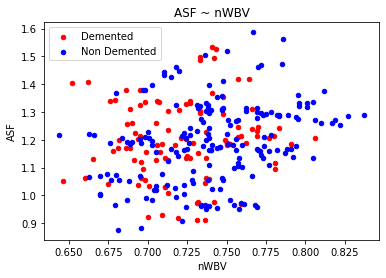

In [172]:


#plotting result
result = Demented.plot(kind='scatter', x = 'nWBV', y = 'ASF', label = 'Demented', color='red')
NonDemented.plot(kind='scatter', x = 'nWBV', y = 'ASF', label = 'Non Demented', color='blue', ax = result)
plt.title("ASF ~ nWBV")



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



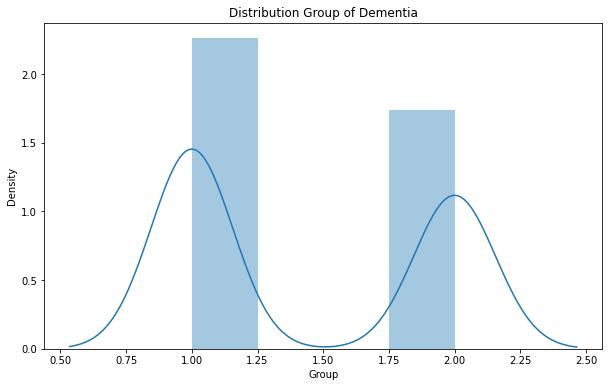

In [173]:


#distribution graph
plt.figure(figsize = (10,6))
sns.distplot(data_frame['Group'])
plt.title("Distribution Group of Dementia")
plt.show()

